#### PROSES 1: MENGURUTKAN TOKOH UTAMA SESUAI TIMELINE

##### Mengimpor Library yang dibutuhkan

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Pada cell code di atas, dilakukan import tiga library penting yang umum digunakan dalam pengolahan data dan citra. Library pertama adalah `NumPy` yang diimpor dengan alias `np`, berfungsi untuk mempermudah operasi matematika seperti manipulasi array dan matrix. Kemudian, `matplotlib.pyplot` diimpor dengan alias `plt`, yang digunakan untuk membuat berbagai jenis visualisasi data, termasuk menampilkan gambar dengan lebih fleksibel. Terakhir, library `OpenCV` diimpor dengan alias `cv`, yang berfungsi untuk membaca, memproses, dan menganalisis gambar serta video dalam berbagai format.


##### Menyimpan gambar yang akan diolah

Pada cell code di bawah ini, dilakukan pembacaan dan penampilan sebuah gambar menggunakan Matplotlib. Gambar dengan nama file `'Assets/aktivis.jpg'` dibaca menggunakan fungsi` plt.imread()` dan disimpan dalam variabel `aktivis`. Kemudian gambar tersebut ditampilkan di layar menggunakan `plt.imshow(aktivis)`. Supaya tampilan gambar lebih bersih tanpa garis sumbu, fungsi `plt.axis('off')` digunakan untuk mematikan penampilan sumbu pada plot.


(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

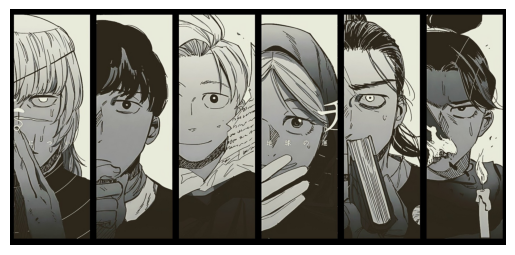

In [30]:
aktivis = plt.imread('Assets/aktivis.jpg')
plt.imshow(aktivis)
plt.axis('off')

##### Fungsi untuk membagi gambar gambar

In [31]:
def cut(piece, x1=0, x2=0, y1=0, y2=0):
    if len(piece.shape) == 3:  
        cutted = piece[y1:y2, x1:x2, :] 
    else:  
        cutted = piece[y1:y2, x1:x2]

    return cutted

Pada cell code di atas, dibuat sebuah fungsi bernama `cut` yang digunakan untuk memotong bagian tertentu dari sebuah gambar atau array. Fungsi ini menerima input berupa `piece`, yaitu gambar yang ingin dipotong, serta empat parameter opsional `x1`, `x2`, `y1`, dan `y2` yang menentukan koordinat batas potongan. Di dalam fungsi, dicek terlebih dahulu apakah gambar memiliki tiga dimensi (misalnya gambar berwarna RGB) menggunakan `len(piece.shape) == 3`. Jika iya, maka potongan dilakukan dengan tetap mempertahankan semua kanal warnanya. Jika tidak, potongan hanya dilakukan pada dua dimensi saja. Potongan gambar hasilnya disimpan ke dalam variabel `cutted` dan dikembalikan sebagai output fungsi.


##### Memotong Citra menjadi 6 bagian dan mengurutkan sesuai tokoh timeline

Pada cell code di bawah, gambar `aktivis` diproses untuk dibagi menjadi enam bagian yang berbeda. Pertama, ukuran gambar diambil dengan memecah nilai shape menjadi `tinggi`, `lebar`, dan d `i` mana mewakili jumlah kanal warna yang tidak digunakan secara langsung. Lalu, `lebar_cut` dihitung dengan membagi lebar gambar menjadi enam bagian yang sama besar. Setelah itu, gambar dipotong menjadi enam potongan menggunakan fungsi `cut` yang sebelumnya sudah dibuat. Masing-masing potongan disimpan dalam variabel `badeni`, `albert`, `rafal`, `jolenta`, `oczy`, dan `draka`, dengan menentukan koordinat `x1` dan `x2` yang bergeser setiap kelipatan `lebar_cut`, sementara nilai `y2` diatur sepanjang tinggi gambar agar potongan meliputi seluruh tinggi gambar. Selanjutnya, dilakukan penampilan keenam potongan gambar aktivis tersebut secara berdampingan dalam satu baris. Pertama, dibuat satu baris (1) dengan enam kolom (6) subplot menggunakan `plt.subplots()`, dengan ukuran keseluruhan figure diatur menjadi 8x8 inci. Setiap subplot kemudian menampilkan salah satu potongan gambar menggunakan `imshow`, yaitu `badeni`, `albert`, `rafal`, `jolenta`, `oczy`, dan `draka`. Masing-masing subplot juga diberi judul sesuai dengan nama variabelnya menggunakan `set_title()` .Terakhir, untuk membuat tampilan gambar lebih bersih tanpa sumbu, seluruh axis pada subplot dimatikan menggunakan list comprehension `[ax[i].axis('off') for i in range(6)]`.

[(np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(452.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(456.5), np.float64(1293.5), np.float64(-0.5))]

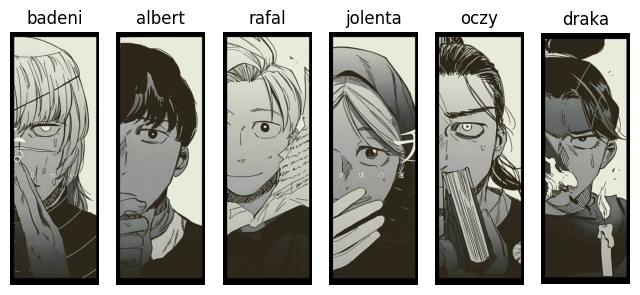

In [32]:
tinggi, lebar, _ = aktivis.shape
lebar_cut = lebar // 6

badeni = cut(aktivis, x2=lebar_cut, y2=tinggi)
albert = cut(aktivis, x1=lebar_cut, x2=2*lebar_cut, y2=tinggi)
rafal = cut(aktivis, x1=2*lebar_cut, x2=3*lebar_cut, y2=tinggi)
jolenta = cut(aktivis, x1=3*lebar_cut, x2=4*lebar_cut, y2=tinggi)
oczy = cut(aktivis, x1=4*lebar_cut, x2=5*lebar_cut, y2=tinggi)
draka = cut(aktivis, x1=5*lebar_cut, x2=lebar, y2=tinggi)

fig, ax = plt.subplots(1, 6, figsize=(8, 8))  
ax[0].imshow(badeni)  
ax[1].imshow(albert)  
ax[2].imshow(rafal)  
ax[3].imshow(jolenta)
ax[4].imshow(oczy)
ax[5].imshow(draka)

ax[0].set_title("badeni")
ax[1].set_title("albert")
ax[2].set_title("rafal")
ax[3].set_title("jolenta")
ax[4].set_title("oczy")
ax[5].set_title("draka")

[ax[i].axis('off') for i in range(6)]
    

##### Menggabungkan gambar menggunakan fungsi numpy

Pada cell code di bawah ini, dilakukan penggabungan beberapa potongan gambar menjadi satu gambar utuh secara horizontal. Fungsi `np.hstack()` digunakan untuk menumpuk gambar `albert`, `draka`, `jolenta`, `badeni`, `oczy`, dan `rafal` secara berdampingan dari kiri ke kanan. Hasil penggabungan ini disimpan dalam variabel `merge`. Kemudian, gambar hasil penggabungan tersebut ditampilkan menggunakan `plt.imshow(merge)`, dan `plt.axis('off')` dipanggil untuk mematikan tampilan sumbu sehingga gambar terlihat lebih bersih.

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

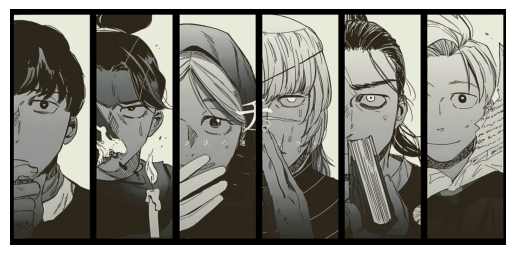

In [33]:
merge = np.hstack([albert, draka, jolenta, badeni, oczy, rafal])
plt.imshow(merge)
plt.axis('off')

#### PROSES 2: MELAKUKAN EKUALISASI

##### Fungsi untuk menghitung frekuensi kemunculan intensitas pixel

In [34]:
def frequency(img, intensity=256):
    if len(img.shape) == 3: 
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    tinggi, lebar = img.shape
    freq = np.zeros(intensity)
    for y in range(tinggi):
        for x in range(lebar):
            freq[img[y, x]] += 1
    return freq

Pada cell code di atas, dibuat sebuah fungsi bernama `frequency` yang digunakan untuk menghitung frekuensi kemunculan setiap tingkat intensitas piksel dalam sebuah gambar. Fungsi ini menerima parameter `img` sebagai input gambar dan `intensity` yang secara default diatur 256, sesuai jumlah kemungkinan nilai piksel pada gambar grayscale. Jika gambar memiliki tiga kanal warna (RGB), gambar terlebih dahulu dikonversi menjadi grayscale menggunakan `cv.cvtColor()`. Selanjutnya, ukuran gambar diambil ke dalam variabel `tinggi` dan `lebar`. Array `freq` berisi nol sebanyak jumlah tingkat intensitas dibuat untuk mencatat jumlah kemunculan masing-masing intensitas. Dengan menggunakan dua loop bersarang, setiap piksel gambar diperiksa, dan nilai frekuensinya pada indeks yang sesuai ditambahkan satu. Akhirnya, array `freq` berisi distribusi frekuensi piksel dikembalikan sebagai output.


##### Fungsi untuk Menghitung Probabilitas Kemunculan Intensitas Pixel

In [35]:
def probability(img, freq, intensity=256):
    tinggi, lebar = img.shape

    prob = np.zeros(intensity)

    for y in range(tinggi):
        for x in range(lebar):
            prob[img[y, x]] = freq[img[y, x]] / (tinggi * lebar)
            
    return prob

Pada cell code di atas, dibuat sebuah fungsi bernama `probability` yang digunakan untuk menghitung probabilitas kemunculan setiap tingkat intensitas piksel dalam gambar berdasarkan distribusi frekuensi yang telah dihitung sebelumnya. Fungsi ini menerima parameter `img` sebagai input gambar, `freq` sebagai array frekuensi, dan `intensity` yang secara default diatur 256, sesuai jumlah kemungkinan nilai piksel pada gambar grayscale. Fungsi ini pertama-tama mengambil ukuran gambar dan menyimpannya dalam variabel `tinggi` dan `lebar`. Kemudian, array `prob` diinisialisasi dengan nol sebanyak jumlah tingkat intensitas. Menggunakan dua loop bersarang, setiap piksel gambar dihitung probabilitas kemunculannya dengan membagi frekuensi masing-masing intensitas piksel dengan total jumlah piksel dalam gambar (`tinggi * lebar`). Hasil perhitungan probabilitas tersebut disimpan dalam array `prob`, yang kemudian dikembalikan sebagai output.

##### Fungsi untuk Menghitung Distribusi Kumulatif

In [36]:
def cumulative(prob, intensity=256):
    cumu = np.zeros(intensity)
    cumu[0] = prob[0]

    for i in range(1, intensity):
        cumu[i] = cumu[i-1] + prob[i]
        
    return cumu

Pada cell code di atas, dibuat sebuah fungsi bernama `cumulative` yang digunakan untuk menghitung distribusi kumulatif dari probabilitas intensitas piksel dalam gambar. Fungsi ini menerima parameter `prob` yang berisi probabilitas setiap tingkat intensitas dan `intensity` yang secara default diatur 256, sesuai jumlah kemungkinan nilai piksel pada gambar grayscale. Fungsi ini pertama-tama menginisialisasi array `cumu` dengan nol sebanyak jumlah tingkat intensitas. Nilai pertama dari distribusi kumulatif (`cumu[0]`) diatur sama dengan nilai probabilitas pertama (`prob[0]`). Selanjutnya, dengan menggunakan loop mulai dari indeks 1 hingga intensity-1, setiap elemen pada array `cumu` dihitung dengan menjumlahkan nilai kumulatif sebelumnya (`cumu[i-1]`) dan nilai probabilitas pada indeks i (`prob[i]`). Hasil distribusi kumulatif ini kemudian dikembalikan sebagai output.

##### Fungsi untuk memetakan nilai intensitas pixel

In [37]:
def cumulative_mapping(cum, intensity=256):
    mapping = np.zeros(intensity)

    for i in range(intensity):
        mapping[i] = np.round((intensity-1) * cum[i])
        
    return mapping

Pada cell code di atas, dibuat sebuah fungsi bernama `cumulative_mapping` yang digunakan untuk menghitung pemetaan kumulatif berdasarkan distribusi kumulatif yang telah dihitung sebelumnya. Fungsi ini menerima parameter `cum` yang berisi distribusi kumulatif dan intensity yang secara default diatur 256, sesuai jumlah kemungkinan nilai piksel pada gambar grayscale. Fungsi ini pertama-tama menginisialisasi array `mapping` dengan nol sebanyak jumlah tingkat intensitas. Selanjutnya, dengan menggunakan loop, setiap elemen pada array `mapping[i]` dihitung dengan mengalikan nilai kumulatif pada indeks i (`cum[i]`) dengan intensity-1 dan membulatkan hasilnya menggunakan `np.round()`. Pemetaan ini berfungsi untuk mentransformasi nilai intensitas piksel asli menjadi nilai baru yang sesuai dengan distribusi kumulatif. Hasil pemetaan ini kemudian dikembalikan sebagai output.

#### Fungsi untuk melakukan Ekualisasi

In [38]:
def equalisasi(img, mapping, intensity=256):
    tinggi, lebar = img.shape

    equalized = np.zeros((tinggi, lebar)).astype(int)

    for y in range(tinggi):
        for x in range(lebar):
            equalized[y, x] = mapping[img[y, x]]
            
    return equalized

Pada cell code di atas, dibuat sebuah fungsi bernama `equalization` yang digunakan untuk melakukan proses equalization pada gambar menggunakan pemetaan kumulatif yang telah dihitung sebelumnya. Fungsi ini menerima parameter `img` sebagai input gambar, `mapping` yang berisi pemetaan kumulatif, dan `intensity` yang secara default diatur 256, sesuai jumlah kemungkinan nilai piksel pada gambar grayscale. Fungsi ini pertama-tama mengambil ukuran gambar dan menyimpannya dalam variabel `tinggi` dan `lebar`, lalu menginisialisasi array `equalized` dengan ukuran yang sama dengan gambar asli dan berisi nilai nol. Dengan menggunakan dua loop bersarang, setiap piksel gambar diubah berdasarkan pemetaan yang disediakan pada array `mapping`. Nilai piksel baru dihitung dengan menggantikan setiap nilai intensitas pada gambar asli dengan nilai yang sesuai pada indeks yang sama di array `mapping`. Hasil dari proses equalization ini disimpan dalam array `equalized`, yang kemudian dikembalikan sebagai output.

#### Melakukan Ekualisasi terhadap citra yang sudah digabung

Pada cell code di bawah, gambar yang telah digabungkan sebelumnya (`merge`) diubah menjadi gambar grayscale dengan menggunakan fungsi `cv`.`cvtColor()` dan parameter `cv.COLOR_RGB2GRAY`. Hasil konversi ini disimpan dalam variabel` merge_gray`. Selanjutnya, gambar grayscale ini diproses dengan melakukan serangkaian langkah untuk meningkatkan kontrasnya melalui histogram `equalization`. Proses tersebut dimulai dengan menghitung frekuensi piksel pada gambar menggunakan fungsi `frequency()`, lalu menghitung probabilitas kemunculannya dengan fungsi `probability()`. Setelah itu, distribusi kumulatif dihitung dengan fungsi `cumulative()`, dan pemetaan kumulatifnya diperoleh dengan fungsi `cumulative_mapping()`. Proses equalization dilakukan dengan menggunakan fungsi `equalisation()`, yang menghasilkan gambar yang sudah diperbaiki kontrasnya, disimpan dalam variabel `equalized`.

Untuk visualisasi, dua subplot ditampilkan dalam satu figure berukuran 8x8 inci. Gambar asli sebelum equalization ditampilkan di subplot pertama (`ax[0]`), dan gambar yang telah mengalami equalization ditampilkan di subplot kedua (`ax[1]`). Masing-masing subplot diberi judul yang sesuai, yaitu "before equalization" dan "after equalization". Terakhir, sumbu pada kedua subplot dimatikan dengan menggunakan list comprehension `[ax[i].axis('off') for i in range(2)]` agar tampilan gambar lebih bersih tanpa sumbu.

[(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))]

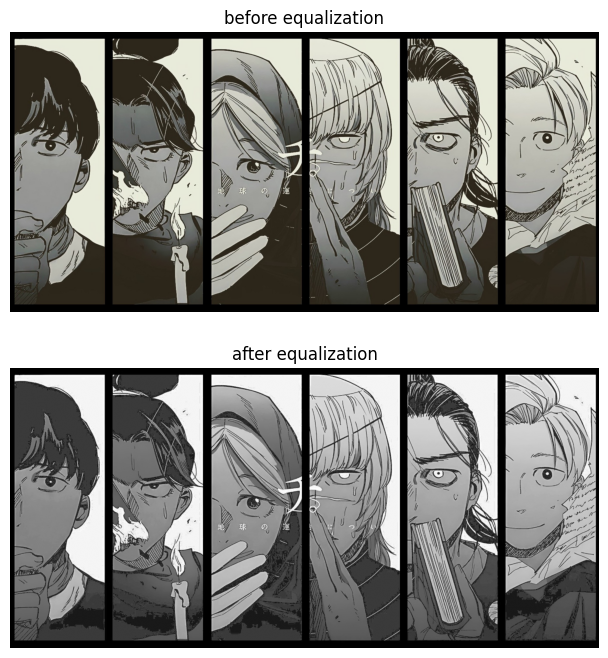

In [39]:
merge_gray = cv.cvtColor(merge, cv.COLOR_RGB2GRAY)

equalized = equalisasi(merge_gray, cumulative_mapping(cumulative(probability(merge_gray, frequency(merge_gray)))))

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].imshow(merge)
ax[1].imshow(equalized, cmap = 'gray')

ax[0].set_title("before equalization")
ax[1].set_title("after equalization")

[ax[i].axis('off') for i in range(2)]

#### PROSES 3: MELAKUKAN SPESIFIKASI TERHADAP GAMBAR YANG SUDAH DI EKUALISASI

##### Load & show citra patokan untuk spesifikasi

Pada cell code di bawah, dua gambar berbeda dimuat menggunakan `plt.imread()` dan disimpan dalam variabel `spe1` dan `spe2`. Gambar pertama (`spe1`) diambil dari file `'Assets/propaganda.jpg'` dan gambar kedua (`spe2`) diambil dari file `'Assets/draka.jpg'`. Selanjutnya, dibuat sebuah figure dengan dua subplot berdampingan menggunakan `plt.subplots()`, dengan ukuran figure diset menjadi 12x12 inci. Gambar spe1 ditampilkan di subplot pertama (`ax[0]`), dan gambar `spe2` ditampilkan di subplot kedua (`ax[1]`). Masing-masing subplot diberi judul yang sesuai, yaitu "Spesifikasi 1" untuk subplot pertama dan "spesifikasi 2" untuk subplot kedua. Terakhir, sumbu pada kedua subplot dimatikan dengan menggunakan list comprehension `[ax[i].axis('off') for i in range(2)]` agar tampilan gambar lebih bersih tanpa sumbu.

[(np.float64(-0.5), np.float64(1199.5), np.float64(667.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(1917.5), np.float64(1031.5), np.float64(-0.5))]

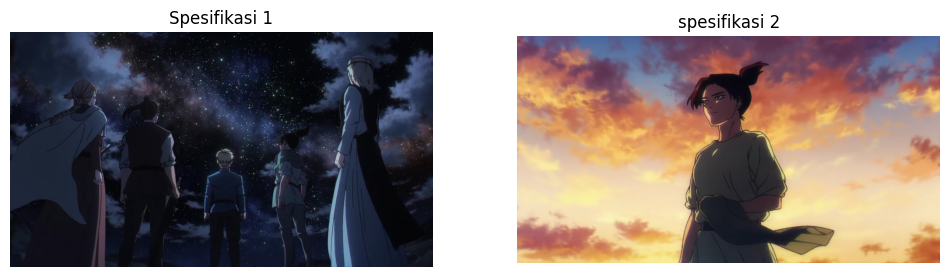

In [40]:
spe1 = plt.imread('Assets/propaganda.jpg')
spe2 = plt.imread('Assets/draka.jpg')

fig, ax = plt.subplots(1, 2, figsize= (12, 12))
ax[0].imshow(spe1)
ax[1].imshow(spe2)

ax[0].set_title("Spesifikasi 1")
ax[1].set_title("spesifikasi 2")

[ax[i].axis('off') for i in range(2)]

##### Mengubah citra tujuan menjadi grayscale

Pada cell code di bawah, kedua gambar yang sebelumnya dimuat (`spe1` dan `spe2`) diubah menjadi gambar grayscale menggunakan fungsi `cv.cvtColor()` dengan parameter `cv.COLOR_RGB2GRAY`. Gambar pertama (`spe1`) diubah menjadi grayscale dan disimpan dalam variabel `spe1_gray`, sedangkan gambar kedua (`spe2`) diubah menjadi grayscale dan disimpan dalam variabel `spe2_gray`. Kemudian, dua subplot dibuat dalam satu figure dengan ukuran 12x12 inci menggunakan `plt.subplots()`. Gambar `spe1_gray` ditampilkan di subplot pertama (`ax[0]`) dan gambar `spe2_gray` ditampilkan di subplot kedua (`ax[1]`). Kedua gambar tersebut ditampilkan dengan colormap `gray` untuk memastikan tampilan grayscale. Masing-masing subplot diberi judul "Spesifikasi 1" dan "spesifikasi 2" sesuai dengan gambar yang ditampilkan. Terakhir, sumbu pada kedua subplot dimatikan menggunakan list comprehension `[ax[i].axis('off') for i in range(2)]` untuk memberikan tampilan gambar yang bersih tanpa sumbu.

[(np.float64(-0.5), np.float64(1199.5), np.float64(667.5), np.float64(-0.5)),
 (np.float64(-0.5), np.float64(1917.5), np.float64(1031.5), np.float64(-0.5))]

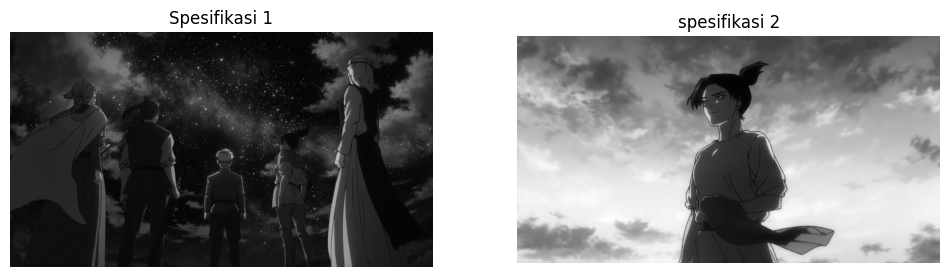

In [41]:
spe1_gray = cv.cvtColor(spe1, cv.COLOR_RGB2GRAY)
spe2_gray = cv.cvtColor(spe2, cv.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize= (12, 12))
ax[0].imshow(spe1_gray, cmap = 'gray')
ax[1].imshow(spe2_gray, cmap = 'gray')

ax[0].set_title("Spesifikasi 1")
ax[1].set_title("spesifikasi 2")

[ax[i].axis('off') for i in range(2)]

##### Fungsi untuk mencari intensitas terdekat

In [42]:
def intenclosest(source, target):
    min = abs(source - target[0])

    closest = 0

    for i in range(len(target)):
        check = abs(source - target[i])
        if(min > check):
            min = check
            closest = i
            
    return closest

Pada cell code di atas, dibuat sebuah fungsi bernama `intenclosest` yang digunakan untuk mencari nilai intensitas target yang paling dekat dengan sumber tertentu. Fungsi ini menerima dua parameter: `source`, yang merupakan nilai intensitas piksel yang ingin dicari kecocokannya, dan `target`, yang merupakan array dari nilai-nilai intensitas yang akan dibandingkan dengan source. Fungsi ini pertama-tama menginisialisasi variabel `min` dengan nilai absolut selisih antara `source` dan elemen pertama dari array `target`. Variabel `closest` diinisialisasi dengan nilai 0, yang berfungsi untuk menyimpan indeks dari elemen target yang memiliki nilai intensitas paling dekat dengan `source`. Dengan menggunakan loop for, fungsi ini memeriksa selisih absolut antara `source` dan setiap elemen dalam target. Jika ditemukan selisih yang lebih kecil daripada nilai `min`, maka nilai `min` diperbarui, dan indeks dari elemen `target` yang lebih dekat disimpan dalam variabel `closest`. Akhirnya, fungsi mengembalikan indeks elemen dari target yang memiliki nilai intensitas paling dekat dengan `source`.

#### Fungsi untuk melakukan pemetaan baru

In [43]:
def new_inten_map(source, target, intensity=256):
    mapping = np.zeros(256)

    for i in range(256):
        mapping[i] = intenclosest(source[i], target)
        
    return mapping

Pada cell code di atas, dibuat sebuah fungsi bernama `new_inten_map` yang digunakan untuk membuat pemetaan intensitas baru berdasarkan perbandingan antara dua array intensitas, yaitu `source` dan `target`. Fungsi ini menerima tiga parameter: `source`, yang merupakan array nilai intensitas sumber, `target`, yang merupakan array nilai intensitas target, dan `intensity`, yang secara default diatur 256 (menyesuaikan dengan jumlah tingkat intensitas dalam gambar grayscale). Fungsi ini pertama-tama menginisialisasi array `mapping` dengan panjang 256, yang akan digunakan untuk menyimpan pemetaan intensitas. Kemudian, dengan menggunakan loop for yang berjalan sebanyak 256 kali (untuk setiap nilai intensitas), fungsi ini memanggil fungsi `intenclosest()` untuk mencari indeks target yang paling dekat dengan setiap nilai dari `source[i]`. Hasilnya disimpan dalam array `mapping`. Setelah semua nilai pemetaan ditemukan, fungsi mengembalikan array `mapping` sebagai hasil pemetaan intensitas baru.

#### Fungsi untuk melakukan spesifikasi

In [44]:
def specification(source, target, intensity=256):
    source_value = cumulative_mapping(cumulative(probability(source, frequency(source))))
    target_value = cumulative_mapping(cumulative(probability(target, frequency(target))))
    mapping = new_inten_map(source_value, target_value)
    
    return equalisasi(source, mapping)

Pada cell code di atas, dibuat sebuah fungsi bernama `specification` yang digunakan untuk melakukan spesifikasi histogram, yaitu proses untuk mengubah distribusi intensitas piksel pada gambar `source` agar sesuai dengan distribusi intensitas pada gambar target. Fungsi ini menerima tiga parameter: `source` dan `target`, yang merupakan gambar sumber dan target, serta intensity yang secara default diatur ke 256.

Pertama, untuk gambar `source`, fungsi ini menghitung nilai distribusi kumulatifnya dengan memanggil `probability()` untuk menghitung probabilitas kemunculan intensitas, `frequency()` untuk menghitung frekuensi intensitas, dan `cumulative()` untuk menghitung distribusi kumulatif. Hasil distribusi kumulatif ini kemudian dipetakan dengan `cumulative_mapping()` untuk mendapatkan pemetaan intensitas pada gambar `source`. Proses yang sama dilakukan untuk gambar target untuk menghasilkan pemetaan intensitas pada gambar target.

Setelah mendapatkan pemetaan intensitas untuk kedua gambar, fungsi `new_inten_map()` dipanggil untuk menghasilkan pemetaan baru yang akan digunakan untuk mengubah distribusi intensitas gambar `source` menjadi sesuai dengan distribusi intensitas gambar target. Terakhir, fungsi `equalisation()` digunakan untuk menerapkan pemetaan tersebut pada gambar `source`, menghasilkan gambar baru yang distribusi intensitasnya sudah disesuaikan dengan gambar target. Fungsi kemudian mengembalikan gambar hasil spesifikasi histogram tersebut.

#### Melakukan spesifikasi terhadap Spe1 & Spe2

Pada cell code di bawah, dilakukan pemrosesan untuk menampilkan beberapa gambar dalam bentuk subplot. Pertama, dua gambar `mergespe1` dan `mergespe2` dihitung dengan menggunakan fungsi `specification()`, yang akan menyelaraskan distribusi intensitas gambar `equalized` dengan gambar `spe1_gray` dan `spe2_gray`, masing-masing.

Kemudian, satu figure dengan ukuran 15x12 inci dibuat menggunakan `plt.figure()`. Di dalam figure tersebut, enam subplot ditampilkan dalam grid 3x2 (3 baris dan 2 kolom). Setiap subplot menampilkan gambar yang berbeda, dimulai dengan gambar `equalized` yang ditampilkan di subplot pertama dan kedua dengan judul `ekualisasi`. Gambar spe1 (yang disebut `Propaganda`) ditampilkan di subplot ketiga, sedangkan gambar `spe2` (yang disebut '`Draka`') ditampilkan di subplot keempat. Subplot kelima menampilkan hasil spesifikasi histogram antara gambar `equalized` dan `spe1_gray`, diberi judul `Specified-Propaganda Equalized`, sedangkan subplot keenam menampilkan hasil spesifikasi histogram antara gambar `equalized` dan `spe2_gray`, diberi judul `Specified-Draka Equalized`. Pada setiap subplot, sumbu (axis) dimatikan dengan `plt.axis('off')` agar tampilan gambar lebih bersih. Terakhir, baris `plt.tight_layout()` yang dimaksudkan untuk mengatur jarak antar subplot agar tampak lebih rapi.

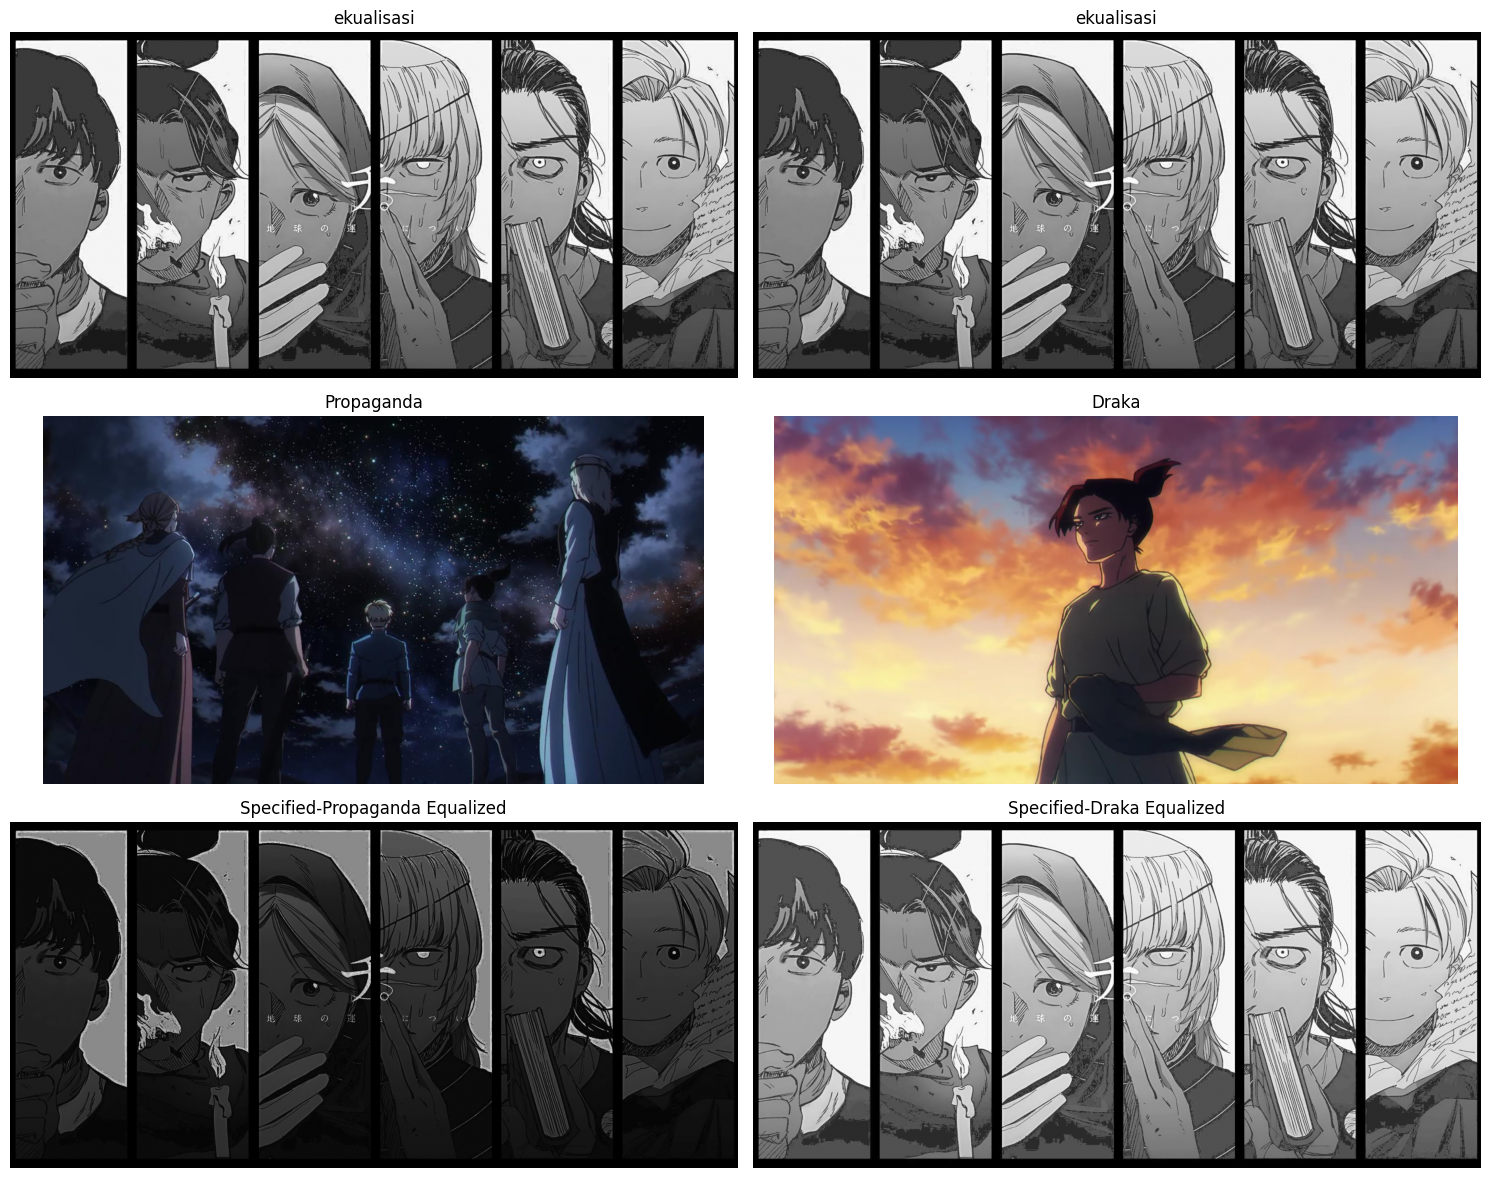

In [45]:
mergespe1 = specification(equalized, spe1_gray) 
mergespe2 = specification(equalized, spe2_gray)

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.title('ekualisasi')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('ekualisasi')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Propaganda')
plt.imshow(spe1, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Draka')
plt.imshow(spe2, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Specified-Propaganda Equalized')
plt.imshow(mergespe1, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Specified-Draka Equalized')
plt.imshow(mergespe2, cmap='gray')
plt.axis('off')

plt.tight_layout()

#### PROSES 4: MENGANALISIS DAN MENYIMPULKAN PERUBAHAN YANG TERJADI

Berdasarkan perbandingan gambar di atas, dapat kita analisis bahwa gambar setelah proses spesifikasi mengalami perubahan distribusi intensitas pixel yang signifikan dibandingkan dengan sebelumnya. Proses spesifikasi bertujuan untuk menyesuaikan distribusi intensitas pixel dari gambar sumber agar menyerupai distribusi intensitas pixel dari gambar referensi.

Dalam kasus spesifikasi antara gambar equalized dengan gambar referensi `spe1`, hasilnya menunjukkan bahwa gambar menjadi lebih gelap. Hal ini disebabkan karena karakteristik visual dari `spe1` yang memiliki intensitas pixel lebih rendah, sehingga distribusi intensitas pixel dari gambar equalized disesuaikan agar lebih condong ke intensitas yang lebih gelap.

Sebaliknya, pada spesifikasi antara gambar equalized dengan gambar referensi `spe2`, hasilnya menunjukkan bahwa gambar menjadi lebih terang. Hal ini terjadi karena karakteristik visual dari `spe2` yang memiliki intensitas pixel lebih tinggi, sehingga distribusi intensitas pixel dari gambar equalized disesuaikan agar lebih condong ke intensitas yang lebih terang.

Kesimpulannya, proses spesifikasi berhasil mengubah distribusi intensitas pixel dari gambar equalized agar lebih sesuai dengan karakteristik visual dari gambar referensi yang digunakan. Proses ini memungkinkan gambar untuk memiliki intensitas yang serupa dengan gambar referensi, baik itu lebih gelap seperti `spe1` maupun lebih terang seperti `spe2`.

#### PROSES 5: MELAKUKAN SPESIFIKASI CITRA SEPERTI PADA HASIL PRESS CONFERENCE

##### Memotong Gambar menjadi potongan potongan yang sesuai

Pada cell code di bawah, gambar yang telah diproses dengan teknik histogram specification dipotong menjadi beberapa bagian menggunakan fungsi `cut()`, seperti `albert_draka`, `draka_spe1`, `jolenta_spe1`, `badeni_oczy`, `badeni_oczy_spe1`, dan `rafal_spe1`. Setiap potongan kemudian ditampilkan dalam grid subplot 3x2 dengan ukuran figure 15x12 inci. Setiap subplot menampilkan potongan gambar yang relevan dengan judul yang sesuai, misalnya "Albert Draka", "Jolenta spe 1", dan "Rafal spe 1". Fungsi `plt.tight_layout()` digunakan untuk merapikan layout subplot agar tidak saling tumpang tindih, memberikan tampilan visual yang jelas dan terstruktur.

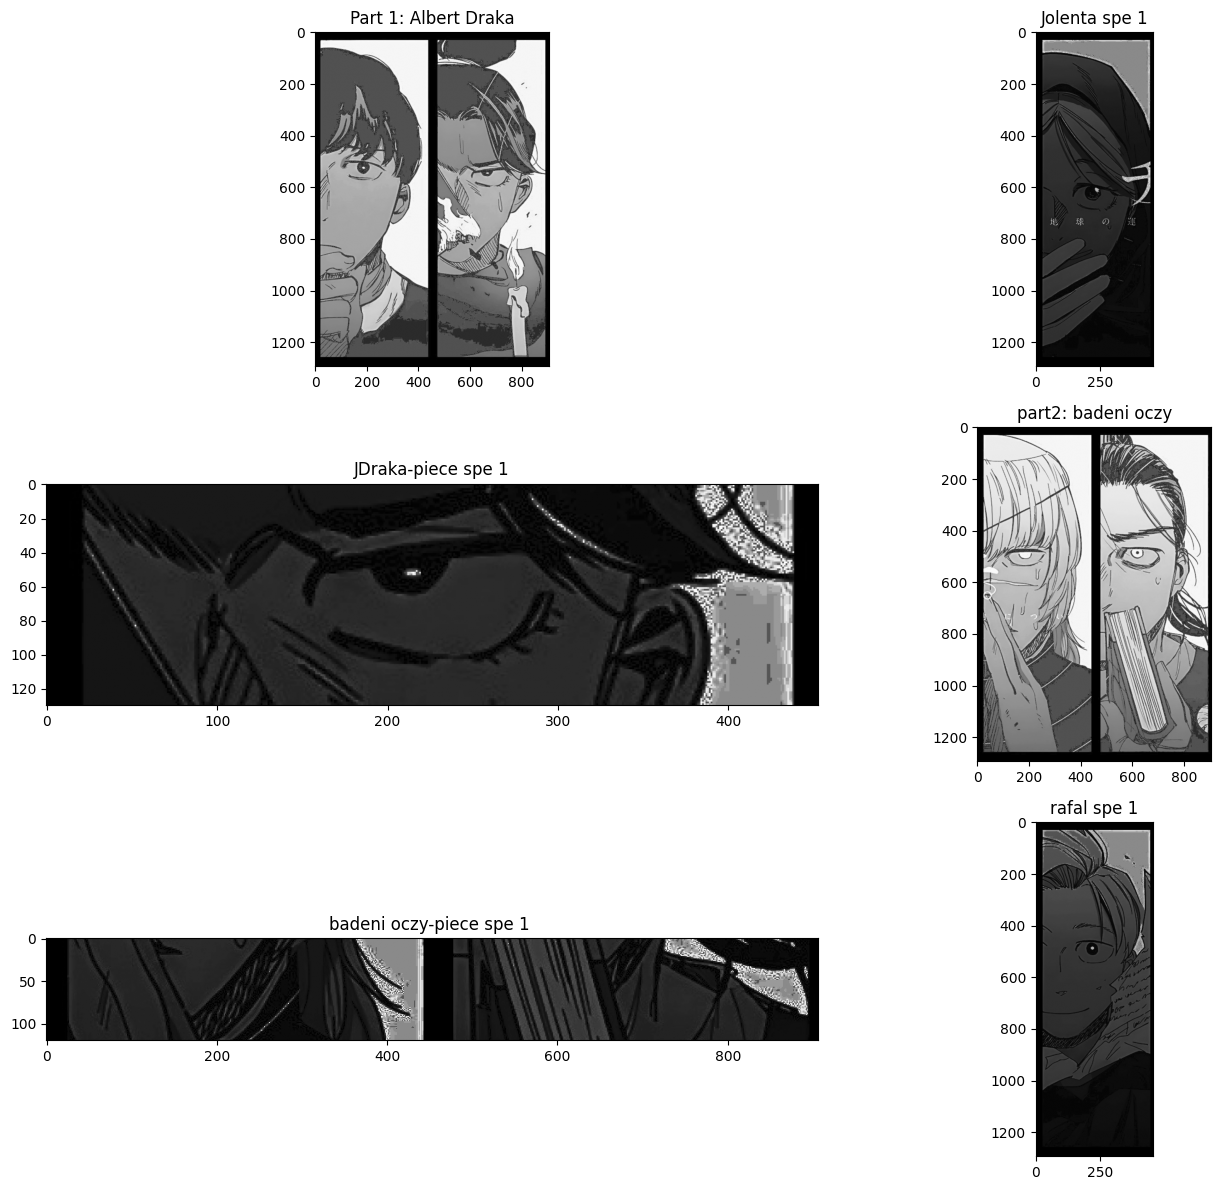

In [46]:
plt.figure(figsize=(15, 12))

albert_draka = cut(mergespe2, x2=2*lebar_cut, y2=tinggi)
draka_spe1 = cut(mergespe1, x1=lebar_cut, x2=2*lebar_cut, y1=tinggi - 800, y2=tinggi - 670)
jolenta_spe1 = cut(mergespe1, x1=2*lebar_cut, x2=3*lebar_cut, y2=tinggi)
badeni_oczy = cut(mergespe2, x1=3*lebar_cut, x2=5*lebar_cut, y2=tinggi)
badeni_oczy_spe1 = cut(mergespe1, x1=3*lebar_cut, x2=5*lebar_cut, y2=tinggi-400, y1=tinggi - 520)
rafal_spe1 = cut(mergespe1, x1=5*lebar_cut, x2=6*lebar_cut, y2=tinggi)
 
plt.subplot(3, 2, 1)
plt.imshow(albert_draka, cmap='gray')
plt.title('Part 1: Albert Draka')

plt.subplot(3, 2, 3)
plt.imshow(draka_spe1, cmap='gray')
plt.title("JDraka-piece spe 1")

plt.subplot(3, 2, 2)
plt.imshow(jolenta_spe1, cmap='gray')
plt.title("Jolenta spe 1")

plt.subplot(3, 2, 4)
plt.imshow(badeni_oczy, cmap='gray')
plt.title("part2: badeni oczy")

plt.subplot(3, 2, 5)
plt.imshow(badeni_oczy_spe1, cmap='gray')
plt.title("badeni oczy-piece spe 1 ")

plt.subplot(3, 2, 6)
plt.imshow(rafal_spe1, cmap='gray')
plt.title("rafal spe 1")

plt.tight_layout()


##### Fungsi untuk menggabungkan Gambar

In [47]:
def gabungkan_gambar(bg_path, ov_path, x, y):
    bg = bg_path  
    ov = ov_path  

    if len(bg.shape) == 2:  
        bg = cv.cvtColor(bg.astype(np.uint8), cv.COLOR_GRAY2RGB)
    if len(ov.shape) == 2:
        ov = cv.cvtColor(ov.astype(np.uint8), cv.COLOR_GRAY2RGB)

    h, w = ov.shape[:2]

    roi = bg[y:y+h, x:x+w]

    if len(ov.shape) == 3 and ov.shape[2] == 4: 
        b, g, r, a = ov[:, :, 0], ov[:, :, 1], ov[:, :, 2], ov[:, :, 3]
        a = a / 255.0

        for c in range(3):
            roi[:, :, c] = (a * ov[:, :, c] + (1 - a) * roi[:, :, c]).astype(np.uint8)
        
        bg[y:y+h, x:x+w] = roi
    elif len(ov.shape) == 3 and ov.shape[2] == 3:
        bg[y:y+h, x:x+w] = ov
    else:
        raise ValueError("Overlay image must have 3 (RGB) or 4 (RGBA) channels.")

    bg = cv.cvtColor(bg, cv.COLOR_BGR2GRAY)
    return bg

Pada cell code di atas, dibuat sebuah fungsi `gabungkan_gambar` yang digunakan untuk menggabungkan dua gambar, yaitu gambar latar belakang (`bg_path`) dan gambar overlay (`ov_path`). Fungsi ini menerima parameter `bg_path` dan `ov_path` sebagai gambar latar belakang dan gambar overlay, serta koordinat `x` dan `y` yang menentukan posisi overlay di latar belakang.

Pertama, fungsi ini memastikan bahwa jika salah satu gambar berformat grayscale (2D array), gambar tersebut dikonversi menjadi RGB. Kemudian, gambar overlay diproses sesuai dengan formatnya. Jika overlay memiliki 4 saluran (RGBA), setiap saluran warna (merah, hijau, biru) di-overlay-kan dengan latar belakang sesuai dengan nilai alpha (transparansi) agar hasilnya terlihat lebih halus dan transparan. Jika overlay hanya memiliki 3 saluran (RGB), maka gambar overlay akan langsung menggantikan bagian gambar latar belakang sesuai dengan posisi yang ditentukan.

Setelah menggabungkan kedua gambar, gambar latar belakang dikonversi kembali menjadi grayscale dan dikembalikan sebagai output. Fungsi ini memungkinkan paduan gambar dengan transparansi atau gambar biasa untuk digabungkan dengan latar belakang yang telah ditentukan.

##### Menggabungkan albert-draka spesifikasi 2 dengan draka-piece spesifikasi 1

Pada cell code di bawah, fungsi `gabungkan_gambar` digunakan untuk menggabungkan dua gambar, yaitu `albert_draka` dan `draka_spe1`. Gambar `draka_spe1` akan diletakkan pada gambar `albert_draka` di posisi koordinat (453, 490), yang ditentukan oleh parameter `x` dan `y`. Hasil gabungan ini disimpan dalam variabel `part1`.

Setelah itu, gambar yang telah digabungkan ditampilkan menggunakan `plt.imshow` dengan colormap `gray` untuk menampilkan gambar dalam mode grayscale. Ukuran figure diatur menjadi 10x10 inci menggunakan `plt.figure(figsize=(10, 10))`, yang memberikan tampilan gambar yang lebih besar dan jelas.

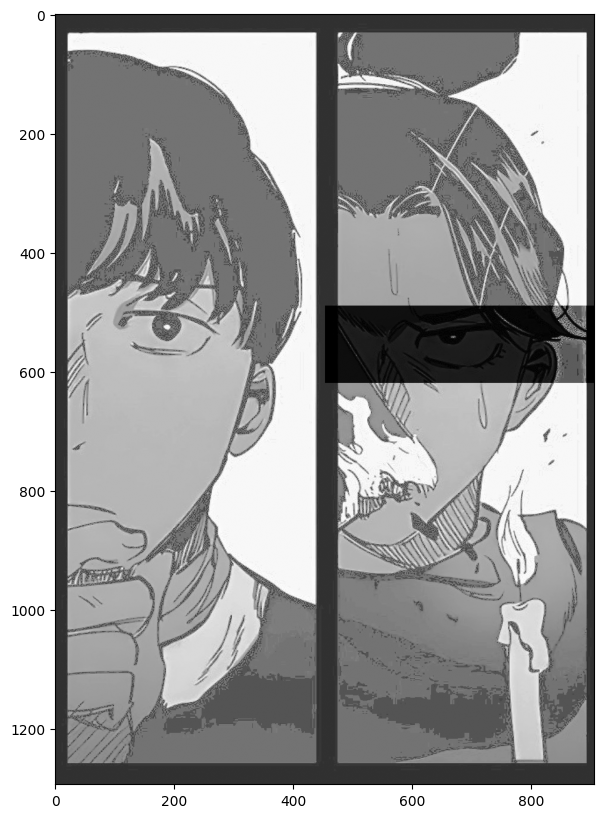

In [48]:
part1 = gabungkan_gambar(albert_draka, draka_spe1, 453, 490)
plt.figure(figsize=(10, 10))
plt.imshow(part1, cmap='gray')

##### Menggabungkan Badeni-Oczy Spesifikasi 2 dengan Badeni-Oczy Piece Spesifikasi 1

Pada cell code di bawah, fungsi `gabungkan_gambar` digunakan kembali untuk menggabungkan dua gambar, yaitu `badeni_oczy` dan `badeni_oczy_spe1`. Gambar `badeni_oczy_spe1` akan ditempatkan pada gambar `badeni_oczy` di posisi koordinat (0, 770), yang ditentukan oleh parameter `x` dan `y`. Hasil gabungan ini disimpan dalam variabel `part2`.

Kemudian, gambar hasil gabungan ini ditampilkan menggunakan `plt.imshow` dengan colormap `gray`, yang menampilkan gambar dalam mode grayscale. Ukuran figure diatur menjadi 15x12 inci menggunakan `plt.figure(figsize=(15, 12))`, memberikan tampilan yang lebih besar dan lebih jelas.

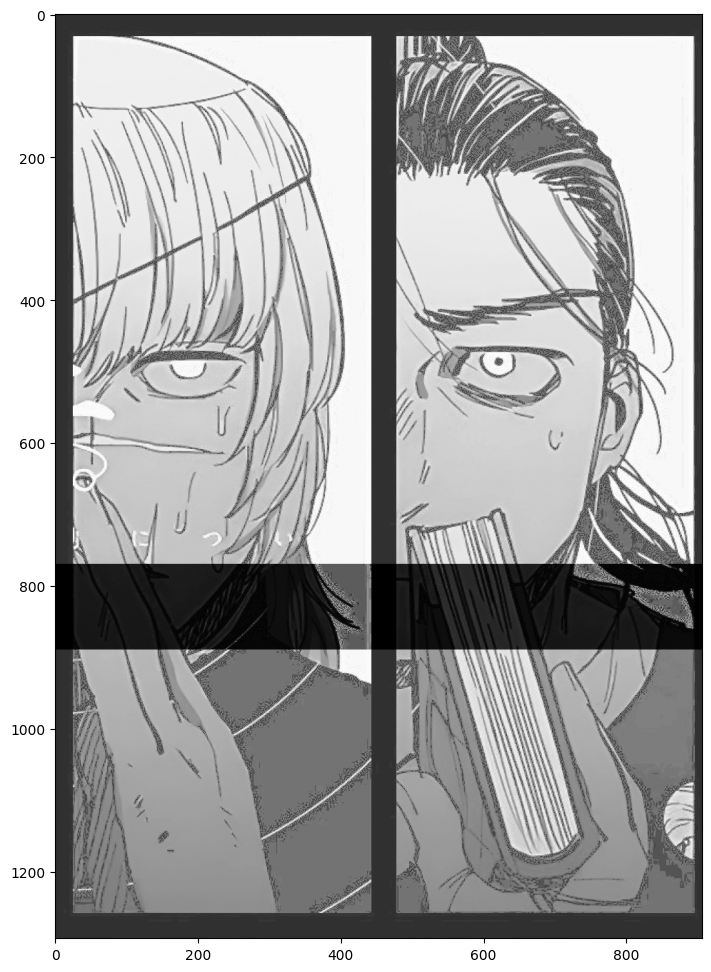

In [49]:
part2 = gabungkan_gambar(badeni_oczy, badeni_oczy_spe1, 0, 770)
plt.figure(figsize=(15, 12))
plt.imshow(part2, cmap='gray')

##### Menggabungkan seluruh piece yang sudah dipotong menggunakan fungsi np.hstack

Pada cell code di bawah, gambar akhir `final_citra1` dibentuk dengan menggabungkan beberapa bagian citra, yaitu `part1`, `jolenta_spe1`, `part2`, dan `rafal_spe1`. Fungsi `np.hstack` digunakan untuk menyusun gambar-gambar tersebut secara horizontal (dalam satu baris) menjadi satu citra utuh.

Kemudian, gambar hasil gabungan ini ditampilkan dengan menggunakan `plt.imshow(final_citra1, cmap='gray')` yang mengonversi gambar ke dalam mode grayscale. Ukuran figure diatur menjadi 15x12 inci untuk memberikan tampilan yang lebih besar. Judul gambar ditambahkan dengan `plt.title("korban")`, yang memberi nama pada citra gabungan ini sebagai "korban".

Text(0.5, 1.0, 'korban')

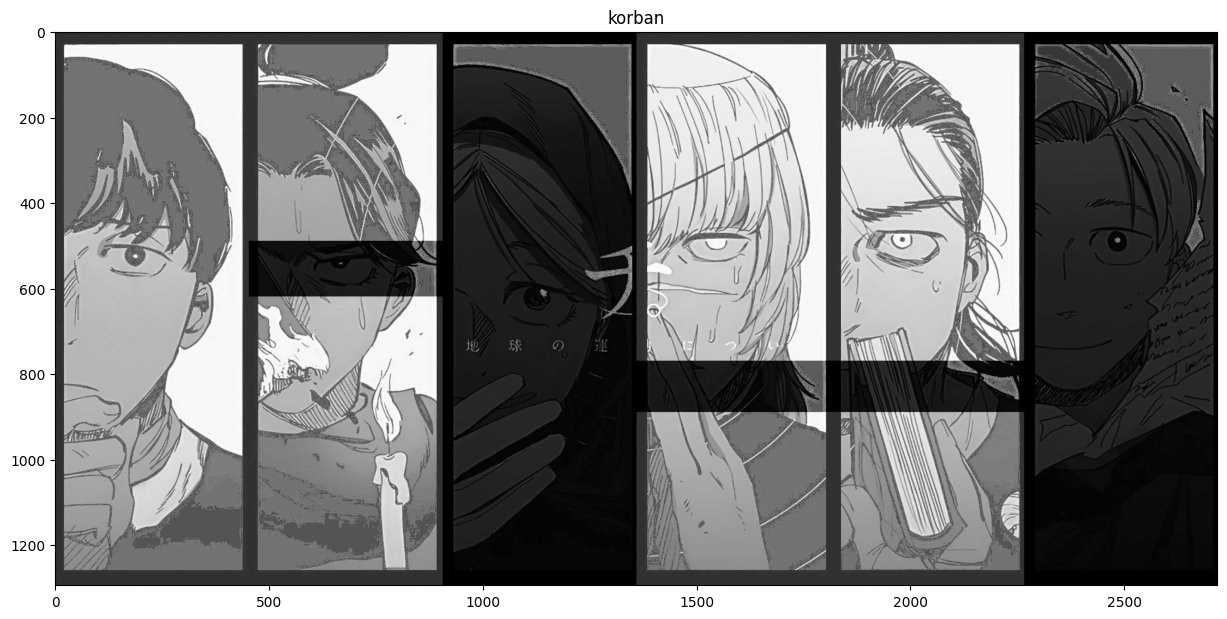

In [50]:
final_citra1 = np.hstack([part1, jolenta_spe1, part2, rafal_spe1])
plt.figure(figsize=(15, 12))
plt.imshow(final_citra1, cmap='gray')
plt.title("korban")

##### Memotong dan menggabungkan citra agar sesuai Ending Final

Pada kode di bawah, dua potongan gambar, yaitu `albertspe2` dan `spe1cut`, digabungkan secara horizontal untuk membentuk citra akhir yang disebut `final_citra2`. Citra ini kemudian ditampilkan dalam tiga subplot yang berbeda: yang pertama menampilkan gambar `albertspe2` dengan judul "Albert", yang kedua menampilkan gambar `spe1cut` dengan judul "korban", dan yang ketiga menampilkan gabungan kedua gambar tersebut dengan judul "Ending Final". Ukuran figure diatur menjadi 15x15 inci, dan `plt.tight_layout()` digunakan untuk merapikan jarak antar subplot agar tampilan lebih teratur dan enak dilihat.

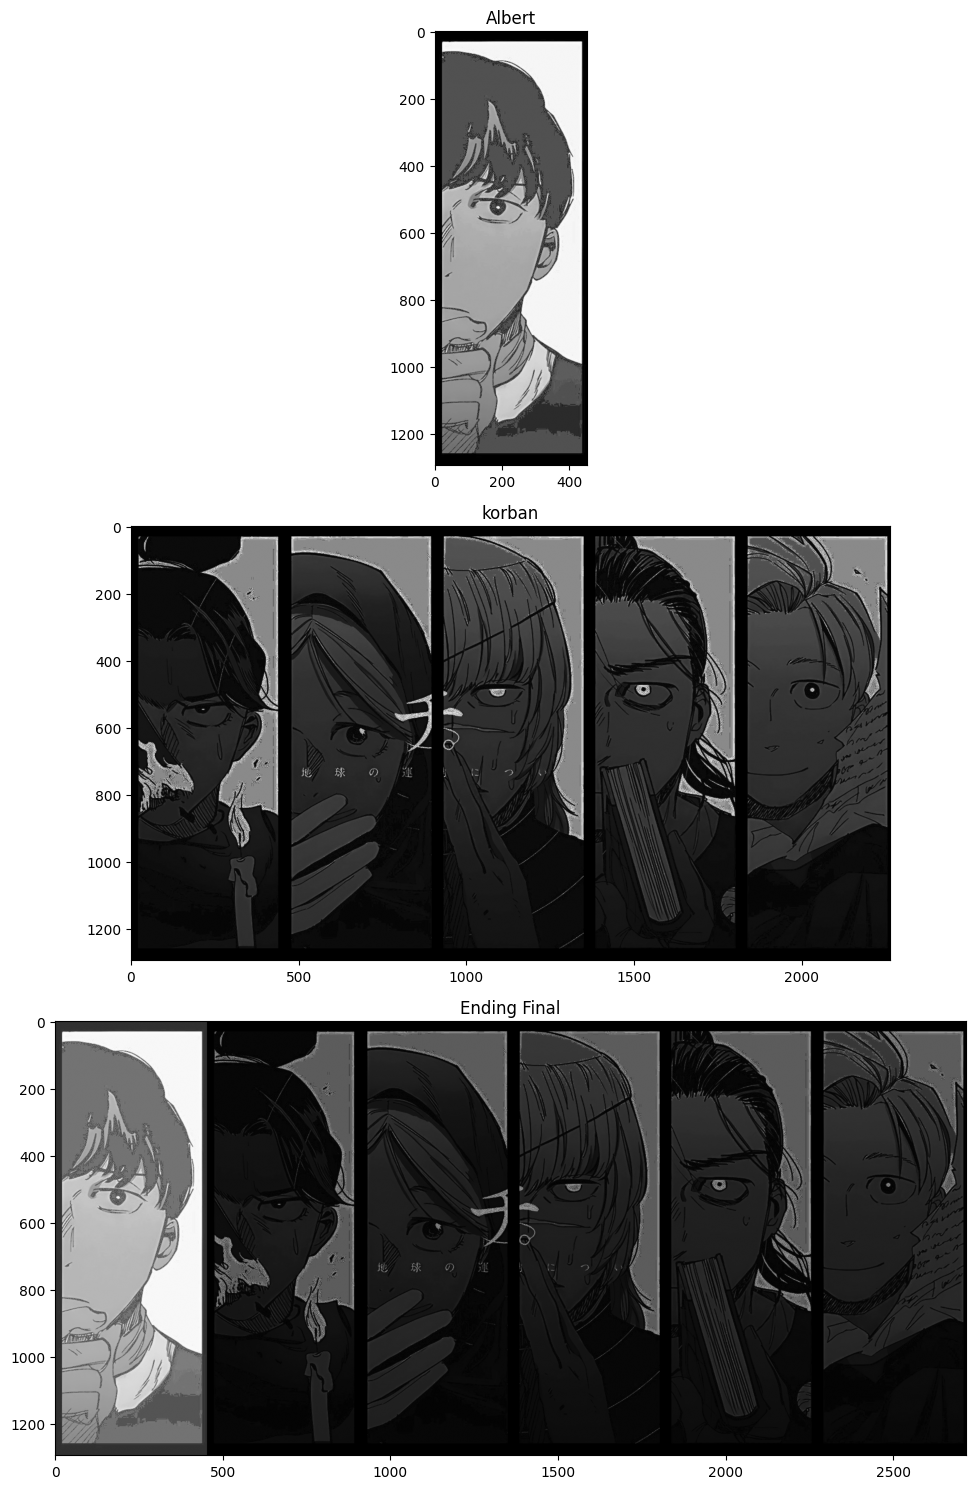

In [51]:
plt.figure(figsize=(15, 15))


albertspe2 = cut(mergespe2, x2=lebar_cut, y2=tinggi)
spe1cut = cut(mergespe1,x1 = lebar_cut,  x2=6*lebar_cut, y2=tinggi)

final_citra2 = np.hstack([albertspe2, spe1cut])

plt.subplot(3, 1, 1)
plt.imshow(albertspe2, cmap='gray')
plt.title("Albert")

plt.subplot(3, 1, 2)
plt.imshow(spe1cut, cmap='gray')
plt.title('korban')

plt.subplot(3, 1, 3)
plt.imshow(final_citra2, cmap='gray')
plt.title('Ending Final')

plt.tight_layout()

Pada cell code bawah ini, dua gambar yang telah digabungkan sebelumnya, yaitu `final_citra1` dan `final_citra2`, ditampilkan dalam dua subplot berbeda. Subplot pertama menampilkan citra `final_citra1` dengan judul "Korban" dan subplot kedua menampilkan citra `final_citra2` dengan judul "Ending Final". Ukuran figure ditetapkan menjadi 15x12 inci, dan `plt.tight_layout()` digunakan untuk memastikan bahwa tata letak antar subplot rapi. Terakhir, `plt.show()` digunakan untuk menampilkan gambar yang telah diatur.

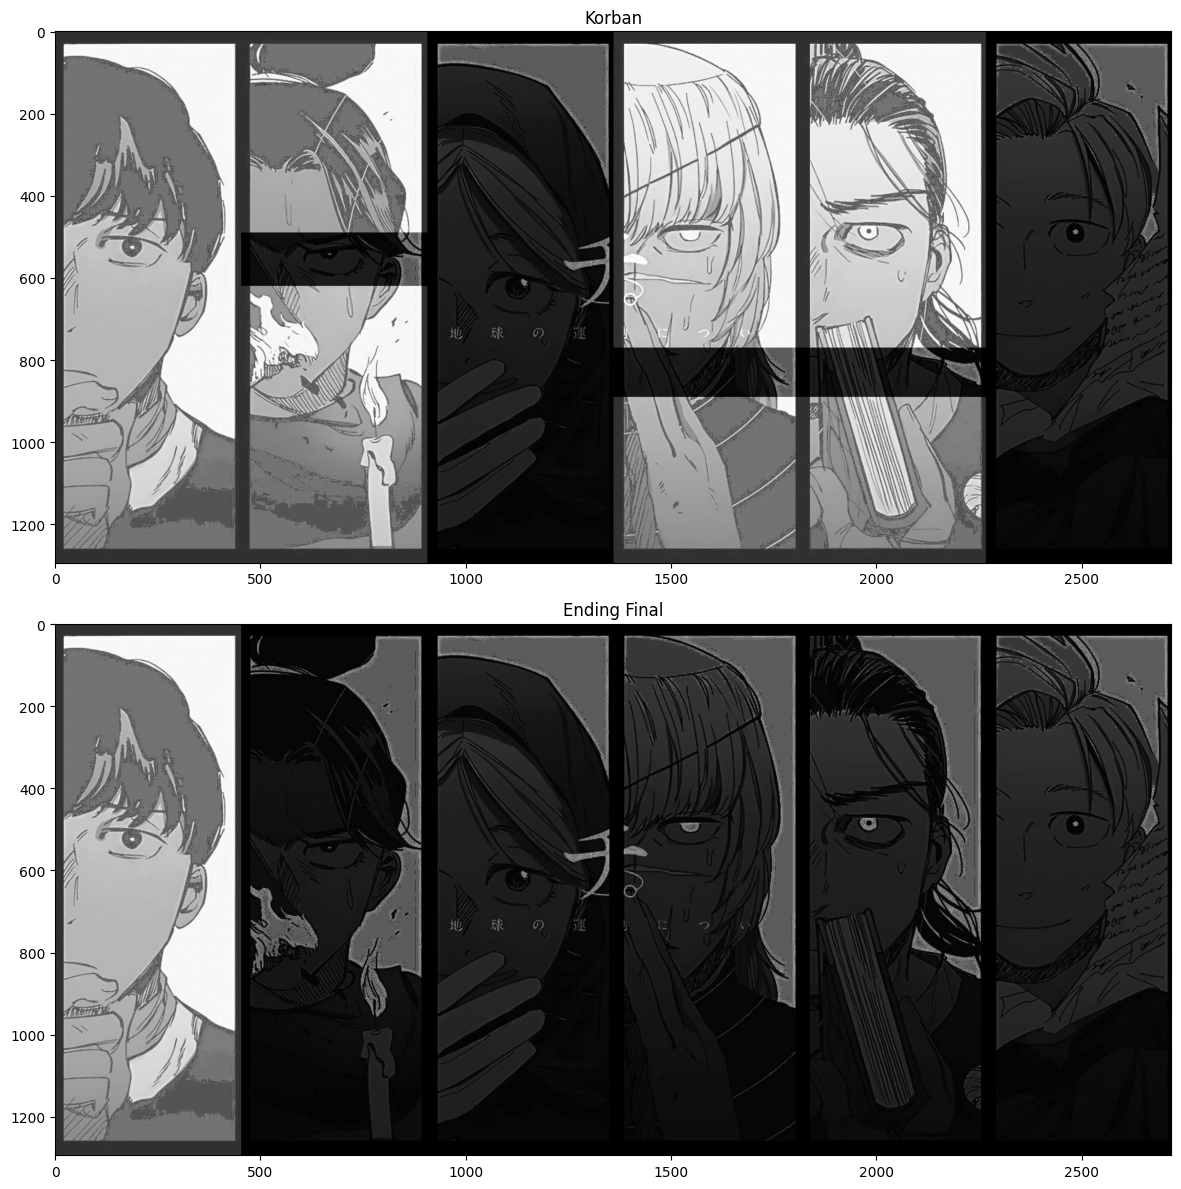

In [52]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
plt.imshow(final_citra1, cmap='gray')
plt.title('Korban')

plt.subplot(2, 1, 2)
plt.imshow(final_citra2, cmap='gray')
plt.title('Ending Final')

plt.tight_layout()
plt.show()